# Latar Belakang
Sebuah perusahaan yang bergerak dalam bidang Pengiriman Retail Online ingin mengetahui apakah barang yang dikirim sampai tepat waktu atau tidak. Perusahaan ini mempunyai tiga macam metode pengiriman. Jumlah barang yang dikirim banyak tapi tidak semua datang tepat waktu.

## Pernyataan Masalah
Perusahaan ingin mengetahui apa penyebab barang tidak sampai tepat waktu. Informasi ini akan membantu perusahaan untuk meningkatkan rating perusahaan dan untuk mengurangi jumlah barang yang tidak sampai tepat waktu.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Apa saja kemungkinan penyebab sebuah barang tidak sampai tepat waktu?**



# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1LiIEty4z_jZSIV7CvsNjMTpQuuAdDDha/view?usp=drive_link).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  chi2_contingency
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait block gudang, metode pengiriman, jumlah telfon masuk ke customer service, rating customer untuk perusahaan, deskripsi produk (harga, berat), jumlah pembelian sebelumnya oleh customer tersebut, prioritas produk, diskon yang diberikan, dan apakah produk sampai tepat waktu atau tidak.
 Ada 12 kolom di dalam dataset Online Retail Shipping, yaitu:  

* ID : ID unik untuk tiap customer
* Warehouse_block: Perusahaan mempunyai sebuah gudang yang dibagikan tergantung blok (A-E)
* Mode_of_Shipment : Metode pengiriman
* Customer_care_calls: Jumlah telfon oleh customer yang masuk ke customer service untuk pertanyaan mengenai pengiriman
* Customer_rating: Rating customer untuk perusahaan
* Cost_of_the_product: Harga produk
* Prior purchases: Jumlah pembelian yang sudah dilakukan sebelumnya oleh customer
* Product_importance: Perusahaan telah mengkategorikan produk dalam berbagai parameter (Low, Medium, High)
* Gender: Jenis kelamin customer
* Discount_offered : Diskon yang diberikan untuk produk tersebut.
* Weight_in_gms: Berat produk
* Reached.on.Time_Y.N: 1 menunjukan bahwa produk tidak sampai tepat waktu, dan 0 menunjukan bahwa produk sampai tepat waktu



Berikut 5 baris teratas dan terbawah dari dataset Online Retail Shipping.

In [ ]:
path = "/content/drive/MyDrive/Online Retail Shipping.csv"
df=pd.read_csv(path)

display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Online Retail Shipping.

In [ ]:
print(f'Ada {df.shape[0]} baris dan {df.shape[1]} kolom di dataset Online Retail Shipping (df)')
df.info()
#non-null dan jumlah baris sama = tidak ada data null

Ada 10999 baris dan 12 kolom di dataset Online Retail Shipping (df)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
display(df.describe(), df.describe(include ='object'))
#warehous_block, mode of shipment, product importance, gender
#harus ditampilkan menggunakan include = 'object' sebab mereka bukan numerical data

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
#Defaultnya hanya 50 , diubah menjadi None supaya unlimited dan yang kelebihan diganti dengan placeholder '...'
pd.set_option('display.max_colwidth', None)
column = df.columns

unique_values = [df[col].unique() for col in column]
nunique_values = [df[col].nunique() for col in column]
missing_value = [df[col].isnull().sum() for col in column]

pd.DataFrame({
    'column name': column,
    'missing_value': missing_value,
    'nunique': nunique_values,
    'unique': unique_values
})
#dari sini kita bisa lihat tidak ada data yang tidak masuk akal.
#Dataset ini termasuk bersih. Kecuali untuk Warehouse_block dan Reached.on.Time_Y.N yang akan kita bahas dibawah.

,column name,missing_value,nunique,unique
0,ID,0,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,0,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,0,3,"[Flight, Ship, Road]"
3,Customer_care_calls,0,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,0,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,0,3,"[low, medium, high]"
8,Gender,0,2,"[F, M]"
9,Discount_offered,0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


In [ ]:
df['Reached.on.Time_Y.N'].value_counts()
#mencari jumlah total produk yang sampai dan tidak sampai tepat waktu


1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
percent = 6563 / (6563+4436) * 100
percent
#persentase

59.66906082371125

Secara umum, kita bisa melihat bahwa:
* dataset Online Retail Shipping memiliki 12 kolom dan 10.999 baris
* dataset tidak memiliki data kosong.
* dataset tidak memiliki anomali/outlier
* Tidak ada data di `customer_care_calls` yang mempunyai jumlah 1 atau 0, ini mengimplikasikan data yang ada di dataset sudah terfilter untuk hanya menerima data yang mempunyai lebih dari 1 telfon ke customer care ATAU mulai mengumpulkan data saat customer sudah melakukan telfon yang ke dua kalinya.
* sama halnya seperti `customer_care_calls`, `previous_purchases` tidak memiliki data yang mempunyai jumlah 1 atau 0.


Penjelasan data lebih lanjut:

1.   `ID`: ID unik untuk tiap customer
2.   `Warehouse_block`: Perusahaan mempunyai gudang yang besar yang dibagikan menjadi 5 blok (A-E)
3.   `Mode_of_Shipment`: Perusahaan mempunyai bermacam metode pengiriman
4.   `Customer_care_calls`: Jumlah telfon oleh customer yang masuk ke customer service untuk pertanyaan mengenai pengiriman
*   rata-rata: 4
*   tertinggi: 7
*   terendah: 2
5.   `Customer_rating`: Rating yang customer berikan untuk perusahaan (1-5) dan rata ratanya adalah 2.99
6.   `Cost_of_the_product`: Harga produk (Kita asumsikan menggunakan USD)
*   Harga rata-rata: 210.2 USD
*   Harga tertinggi: 310 USD
*   Harga terendah: 96 USD
7.   `Prior_purchases`: Jumlah pembelian yang sudah dilakukan oleh customer tersebut sebelumnya.
*   rata-rata: 3.57
*   tertinggi: 10
*   terendah: 2
8.   `Product_importance`: Kita asumsikan perusahaan menentukan level prioritas dalam produk dari yang terendah ke tertinggi (low, medium, high)
9.   `Gender`: Jenis Kelamin Customer
10.   `Discount_Offered`: Diskon yang diberikan untuk produk tersebut. (Kita asumsikan dalam persenan)
*   rata-rata diskon: 13.37%
*   diskon tertinggi: 65%
*   diskon terendah: 1%
11.  `Weight_in_gms`: Berat produk dalam gram.
*   rata-rata berat: 3634 g
*   berat tertinggi: 1001 g
*   berat terendah: 7846 g
12.  `Reached.on.Time_Y.N`: 1 Apabila produk tidak sampai tepat waktu dan 0 Apabila produk sampai tepat waktu. 59.67% Produk tidak sampai tepat waktu. Berarti sekitar 40.33% produk sampai tepat waktu.

**Data Cleaning**


1.    Kolom `Reached.on.Time_Y.N` memiliki data yang sedikit ambigu, karena pada umumnya 1 berarti iya dan 0 berarti tidak. Jadi lebih baik untuk mengubah data yang 1 (Tidak sampai tepat waktu) menjadi 0 dan 0 (Sampai tepat waktu) menjadi 1.

2.   Nama Kolom terlalu panjang, jadi akan diganti biar lebih mudah dikerjakan.
3.   Data yang diharapkan adalah Block A-E namun ada Block F, kita akan mengganti Block F menjadi E
4.   Karena tidak ada *missing values*, kita akan melewati tahap tersebut.
5.   Kolom `ID` berisi ID unik tiap customer dan tidak ada customer ID yang duplikat, sehingga tidak relevan dalam analisis dan bisa dipindah ke index saja.


###Change index

In [ ]:
df.set_index(['ID'], inplace = True)


###Change Column Names

In [ ]:
df.rename(columns={'Warehouse_block': 'block',
                   'Mode_of_Shipment': 'shipment',
                   'Customer_care_calls': 'cs_calls',
                   'Customer_rating': 'rating',
                   'Cost_of_the_Product': 'cost',
                   'Prior_purchases': 'previous_orders',
                   'Product_importance': 'priority',
                   'Gender': 'gender',
                   'Discount_offered': 'discount',
                   'Weight_in_gms': 'weight',
                   'Reached.on.Time_Y.N': 'ontime'},
          inplace=True)

### Change `block`###

In [ ]:
df['block'] = df['block'].replace('F', 'E')

###Change `ontime` ###

In [ ]:
df['ontime'] = df['ontime'].map({1: 0, 0: 1})

Mari kita lihat sekilas data yang sudah kita rapikan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   block            10999 non-null  object
 1   shipment         10999 non-null  object
 2   cs_calls         10999 non-null  int64 
 3   rating           10999 non-null  int64 
 4   cost             10999 non-null  int64 
 5   previous_orders  10999 non-null  int64 
 6   priority         10999 non-null  object
 7   gender           10999 non-null  object
 8   discount         10999 non-null  int64 
 9   weight           10999 non-null  int64 
 10  ontime           10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [ ]:

column = df.columns

unique_values = [df[col].unique() for col in column]
nunique_values = [df[col].nunique() for col in column]
missing_value = [df[col].isnull().sum() for col in column]

pd.DataFrame({
    'column name': column,
    'missing_value': missing_value,
    'nunique': nunique_values,
    'unique': unique_values
})
#melihat data sekali lagi apakah sudah benar atau tidak.

,column name,missing_value,nunique,unique
0,block,0,5,"[D, E, A, B, C]"
1,shipment,0,3,"[Flight, Ship, Road]"
2,cs_calls,0,6,"[4, 2, 3, 5, 6, 7]"
3,rating,0,5,"[2, 5, 3, 1, 4]"
4,cost,0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
5,previous_orders,0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
6,priority,0,3,"[low, medium, high]"
7,gender,0,2,"[F, M]"
8,discount,0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"
9,weight,0,4034,"[1233, 3088, 3374, 1177, 2484, 1417, 2371, 2804, 1861, 1187, 2888, 3253, 3667, 2602, 1009, 2707, 1194, 3952, 2495, 1059, 1521, 2899, 1750, 3922, 3561, 3496, 1066, 1435, 3134, 3819, 2741, 3341, 3795, 3261, 2460, 1811, 1477, 3605, 3905, 2383, 3798, 1265, 1647, 1556, 1328, 2944, 1245, 1576, 3753, 2146, 2042, 1735, 1320, 1128, 3539, 2437, 3096, 3453, 1367, 1923, 2794, 1158, 1292, 1880, 3045, 2881, 1710, 1878, 2512, 2929, 3849, 2229, 2998, 3984, 2442, 3775, 1788, 1518, 3959, 3711, 1942, 1759, 2875, 1364, 2710, 2148, 2910, 2974, 2339, 3880, 1085, 3163, 1188, 3387, 2343, 2034, 1225, 2401, 1104, 1617, ...]"


Jumlah data tidak berubah sama sekali karena dataset ini termasuk bersih.

# Data Analysis
Kita sudah melakukan tahap data cleaning. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu karakteristik produk yang tidak sampai tepat waktu.

Analisis akan dilakukan dengan membandingkan data data produk yang tidak sampai tepat waktu (ontime = 0) dan yang sampai tepat waktu (ontime = 1) berdasarkan features (kolom) yang tersedia.

Saya akan menggunakan chi2 test untuk semua data karena saya ingin mencari tahu apakah terdapat hubungan antara semua features dengan ontime. chi2 test digunakan untuk uji hipotesis apakah dua features (categorical variable) saling berhubungan atau tidak.


In [ ]:
plt.style.use('seaborn-darkgrid')

<Axes: >

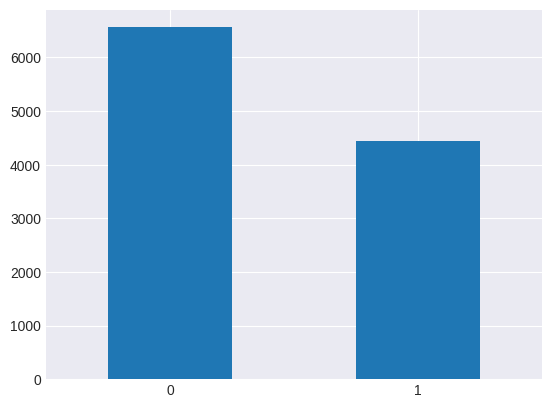

In [ ]:
df['ontime'].value_counts().plot.bar(rot = 0)

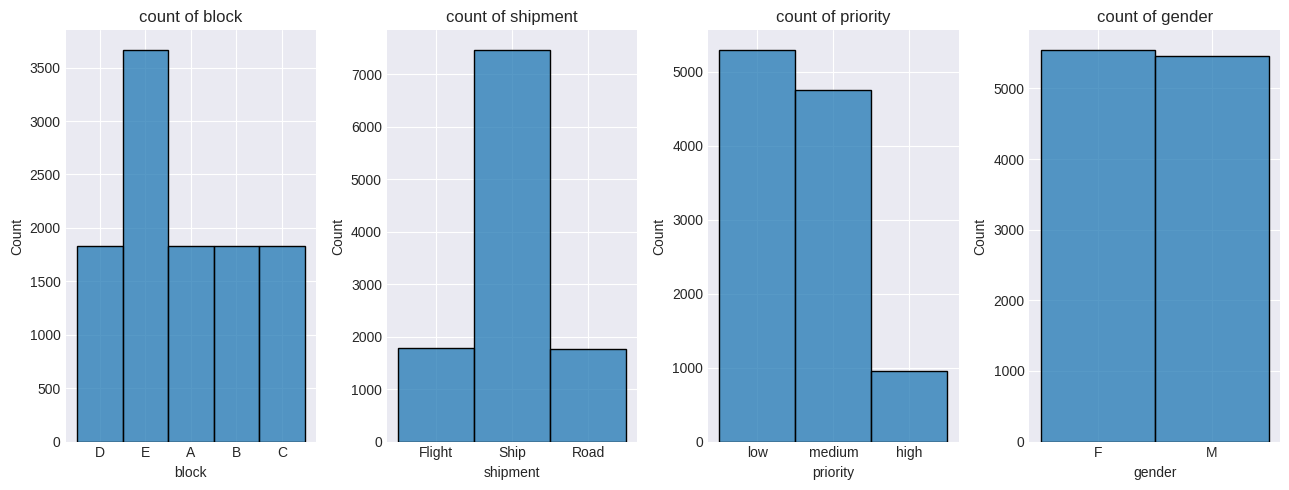

E    3666
D    1834
A    1833
B    1833
C    1833
Name: block, dtype: int64
Ship      7462
Flight    1777
Road      1760
Name: shipment, dtype: int64
low       5297
medium    4754
high       948
Name: priority, dtype: int64
F    5545
M    5454
Name: gender, dtype: int64


In [ ]:
plt.figure(figsize = (13, 5))
col = ['block', 'shipment','priority','gender']
#n = plot number, jumlah grafik yang akan dimunculkan pada satu plot
n = 1
for i in col:
  #subplot(1,4,n) adalah dimensinya, yaitu 1 baris 4 kolom dan n sebagai jumlah grafik yang ditampilkan.
  ax = plt.subplot(1,4, n)
  sns.histplot(x = df[i], data = df, ax = ax)
  plt.title(f'count of {i}')
  n += 1

plt.tight_layout()
plt.show()

for i in col:
  print(df[i].value_counts())

Dari visualisasi diatas, bisa kita lihat bahwa


1.   **Block E** mempunyai jumlah order paling tinggi
2.   Metode pengiriman menggunakan **Kapal** adalah yang paling banyak
3.   Prioritas **Low** sangat banyak dan **Medium** mendekati Low namun untuk **High** hanya sedikit
4.   Pembagian **Gender** sangat rata
5.   Ada 4436 produk yang sampai tepat waktu dan 6563 produk yang tidak sampai tepat waktu



## Ontime vs Shipment
Kita akan membandingkan apakah ada hubungan antara metode pengiriman dan produk sampai tepat waktu menggunakan chi2 test.

shipment  Flight  Road  Ship
ontime                      
0           1069  1035  4459
1            708   725  3003
P-Value: 0.6895487627593785
Tidak terdapat hubungan antara metode pengiriman dan produk sampai tepat waktu (Independent) (H0)


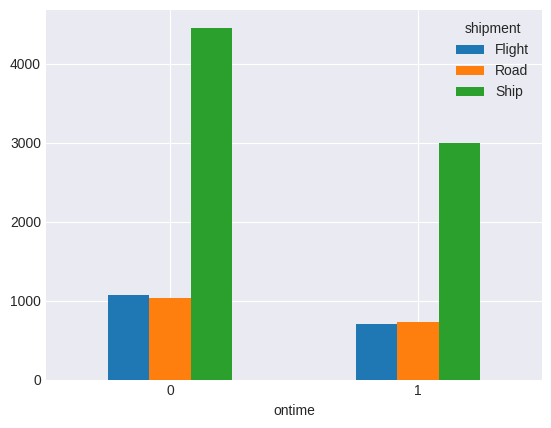

In [ ]:
ct=pd.crosstab(df['ontime'],df['shipment'])
#melakukan crosstab untuk melihat penyebaran metode shipment di data 0 dan 1

print(ct)

alpha = 0.05
chi21, p1, dof1, expected1 = chi2_contingency(ct)
#melakukan chi2 test dengan alpha 0.05
print('P-Value:', p1)

if p1 <= alpha:
  print('Terdapat hubungan antara metode pengiriman dan produk sampai tepat waktu (Dependent) (Reject H0)')
  print(expected1)
else:
  print('Tidak terdapat hubungan antara metode pengiriman dan produk sampai tepat waktu (Independent) (H0)')

barplot = ct.plot.bar(rot=0)

## Ontime vs Block
Kita akan membandingkan apakah ada hubungan antara block gudang dan produk sampai tepat waktu menggunakan chi2 test.

block      A     B     C     D     E
ontime                              
0       1075  1104  1094  1096  2194
1        758   729   739   738  1472
P-Value: 0.8959524278243698
Tidak terdapat hubungan antara block gudang dan produk sampai tepat waktu (Independent) (H0)


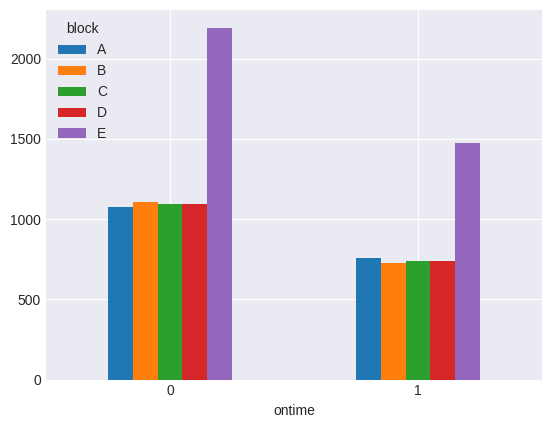

In [ ]:

ct2=pd.crosstab(df['ontime'],df['block'])


print(ct2)


chi22, p2, dof2, expected2 = chi2_contingency(ct2)

print('P-Value:', p2)

if p2 <= alpha:
  print('Terdapat hubungan antara block gudang dan produk sampai tepat waktu (Dependent) (Reject H0)')
  print(expected2)
else:
  print('Tidak terdapat hubungan antara block gudang dan produk sampai tepat waktu (Independent) (H0)')

barplot = ct2.plot.bar(rot=0)

## Ontime vs Gender
Kita akan membandingkan apakah ada hubungan antara jenis kelamin customer dan produk sampai tepat waktu menggunakan chi2 test.

gender     F     M
ontime            
0       3296  3267
1       2249  2187
P-Value: 0.6367032124181522
Tidak terdapat hubungan antara gender dan produk sampai tepat waktu (Independent) (H0)


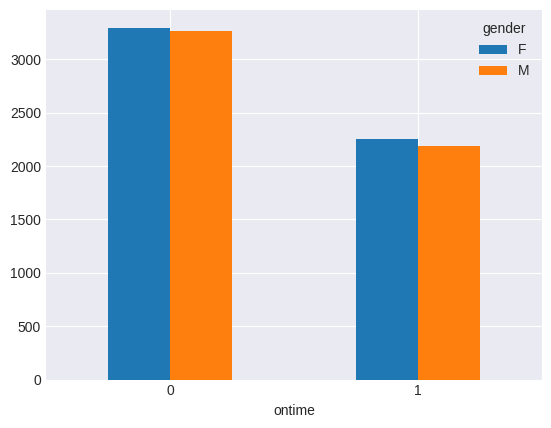

In [ ]:
ct3=pd.crosstab(df['ontime'],df['gender'])


print(ct3)

chi23, p3, dof3, expected3 = chi2_contingency(ct3)

print('P-Value:', p3)

if p3 <= alpha:
  print('Terdapat hubungan antara gender dan produk sampai tepat waktu (Dependent) (Reject H0)')
  print(expected3)
else:
  print('Tidak terdapat hubungan antara gender dan produk sampai tepat waktu (Independent) (H0)')

barplot = ct3.plot.bar(rot=0)

## Ontime vs Priority
Kita akan membandingkan apakah ada hubungan antara prioritas dan produk sampai tepat waktu menggunakan chi2 test.

priority  high   low  medium
ontime                      
0          616  3140    2807
1          332  2157    1947
P-Value: 0.0022303831047450844
Terdapat hubungan antara prioritas dan produk sampai tepat waktu (Dependent) (Reject H0)
Berikut data expected dari chi2_contingency
[[ 566. 3161. 2837.]
 [ 382. 2136. 1917.]]


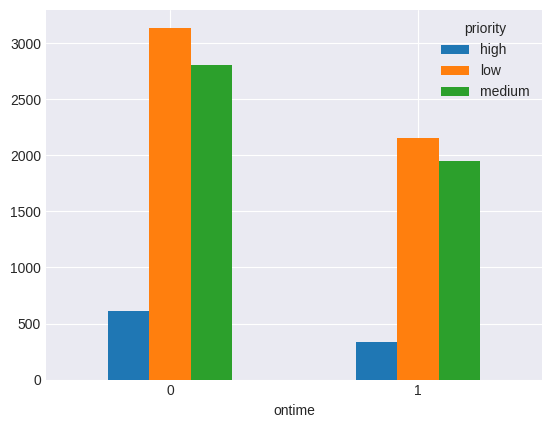

In [ ]:
ct4=pd.crosstab(df['ontime'],df['priority'])


print(ct4)


chi24, p4, dof4, expected4 = chi2_contingency(ct4)

print('P-Value:', p4)

if p4 <= alpha:

  print('Terdapat hubungan antara prioritas dan produk sampai tepat waktu (Dependent) (Reject H0)')
  print('Berikut data expected dari chi2_contingency')
  print(expected4.round())
else:
  print('Tidak terdapat hubungan antara prioritas dan produk sampai tepat waktu (Independent) (H0)')


barplot = ct4.plot.bar(rot=0)

In [ ]:
ct4 - expected4

priority,high,low,medium
ontime,,,
0,50.337303,-20.670152,-29.667152
1,-50.337303,20.670152,29.667152


Dari data tersebut kita bisa lihat bahwa Produk yang mempunyai High Priority lebih mungkin untuk tidak sampai tepat waktu karena untuk prioritas High, lebih banyak 50 data yang tidak sampai tepat waktu dan lebih sedikit 50 data yang sampai tepat waktu dibandingkan dengan expected data oleh chi2 test tersebut.

## Correlation Heatmap
Kita akan menggunakan Correlation heatmap untuk melihat mana data yang sangat bergantung satu sama lain. Lalu kita akan mengetesnya lebih lanjut menggunakan chi2 test.

<Axes: >

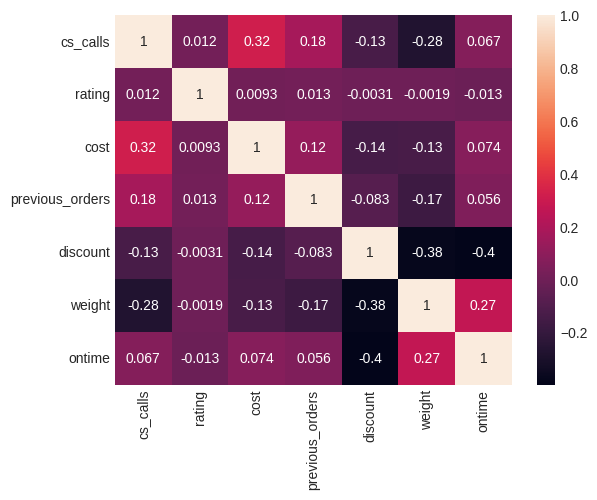

In [ ]:
sns.heatmap(df.corr(), annot=True)

Dari heatmap tersebut, ontime sangat terpengaruh oleh `discount` dan `weight`. (-0,4 dan 0.27)
Maka kita akan melakukan pengujian lebih lanjut hanya untuk `discount` dan `weight` menggunakan chi2 test.

## Ontime vs Discount.
Karena chi2 test hanya bisa digunakan untuk categorical variables, kita akan membuat kolom baru untuk mengkategorikan kolom discount yang mempunyai isi "More than 30" atau "Less than 30" .

Discount More than 30  Less than 30  More than 30
ontime                                           
0                              4853          1710
1                              4436             0

P-Value: 3.8165584253379254e-299
Terdapat hubungan antara produk sampai tepat waktu dan Discount lebih dari 30 (Dependent) (Reject H0)


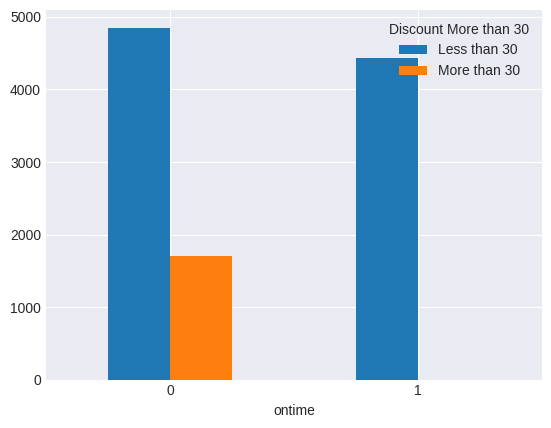

In [ ]:
#kita membuat column baru dengan nama Discount More than 30 untuk bisa melakukan chi2 test dengan baik
#karena chi2 test itu untuk 2 data categorical.
df["Discount More than 30"] = df["discount"].apply(lambda x: "More than 30" if x > 30 else "Less than 30")

ct9 = pd.crosstab(df["ontime"], df["Discount More than 30"])
print(ct9)
print()

chi29, p9, dof9, expected9 = chi2_contingency(ct9)

print('P-Value:', p9)

if p9 <= alpha:
  print('Terdapat hubungan antara produk sampai tepat waktu dan Discount lebih dari 30 (Dependent) (Reject H0)')
else:
  print('Tidak terdapat hubungan antara produk sampai tepat waktu dan Discount lebih dari 30 (Independent) (H0)')

barplot = ct9.plot.bar(rot=0)



Dari grafik diatas bisa kita simpulkan bahwa semua barang yang memiliki diskon lebih dari 30% semuanya tidak sampai tepat waktu dan sudah di konfirmasi oleh chi2 test.


## Ontime vs Weight.
Karena chi2 test hanya bisa digunakan untuk categorical variables, kita akan membuat kolom baru untuk mengkategorikan kolom weight yang mempunyai isi "> 3635g" atau "< 3635g .

Weight  < 3635 g  > 3635g
ontime                   
0           3653     2910
1           1046     3390

P-Value: 8.429666718467313e-244
Terdapat hubungan antara produk sampai tepat waktu dan Berat lebih dari rata-rata (3635g) (Dependent) (Reject H0)


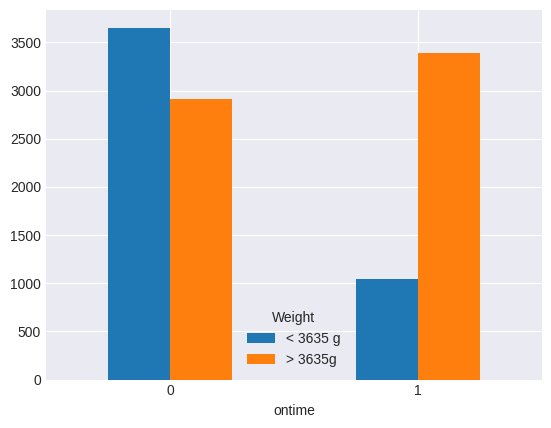

In [ ]:
#kita membuat column baru dengan nama Weight > Mean untuk bisa melakukan chi2 test dengan baik
#karena chi2 test itu untuk 2 data categorical.
df["Weight"] = df["weight"].apply(lambda x: "> 3635g" if x > df["weight"].mean() else "< 3635 g")

ct10 = pd.crosstab(df["ontime"], df["Weight"])
print(ct10)
print()

chi210, p10, dof10, expected10 = chi2_contingency(ct10)

print('P-Value:', p10)

if p10 <= alpha:
  print('Terdapat hubungan antara produk sampai tepat waktu dan Berat lebih dari rata-rata (3635g) (Dependent) (Reject H0)')
else:
  print('Tidak terdapat hubungan antara produk sampai tepat waktu dan Berat lebih dari rata-rata (3635g) (Independent) (H0)')

barplot = ct10.plot.bar(rot=0)



Bisa kita simpulkan bahwa barang yang memiliki berat dibawah rata-rata (3635g) lebih memungkinkan untuk TIDAK sampai tepat waktu.

In [ ]:
#export csv file utk Tableu
# df.to_csv('/content/drive/MyDrive/OnlineRetailShipping_Cleaned.csv')

In [ ]:
#menghapus column baru yang kita buat
df.drop(["Discount More than 30", 'Weight'], axis = 1, inplace = True)


# Conclusion

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan tentang produk yang sampai tepat waktu atau tidak:
* Dari 10999 data yang kita miliki, hanya 4436 data yang sampai tepat waktu
* Barang dari Block E mempunyai jumlah pengiriman tertinggi
* Metode pengiriman terbanyak adalah menggunakan kapal (Ship).
* Gender, Block, Shipment, CS_calls, Cost, Rating, Previous Orders tidak mempengaruhi barang sampai tepat waktu atau tidak
* Prioritas barang yang tinggi (High) lebih banyak tidak sampai tepat waktu.
* Diskon lebih dari 30% SEMUANYA tidak sampai tepat waktu.
* Barang yang beratnya lebih ringan dari rata-rata (3635g) jauh lebih banyak yang tidak sampai tepat waktu.
* Tidak bisa mengambil tindakan yang tepat terhadap pengaruh diskon yang besar terhadap barang tidak sampai tepat waktu dikarenakan oleh features data yang kurang.



# Recommendation

1. Memperbaiki prioritas produk / pengelolaan produk yang berprioritas tinggi. Semustinya produk yang prioritasnya tinggi datang sampai tepat waktu.
2. Barang yang ringan harus diserempakan oleh barang barang yang lain karena terkadang muatan dalam kapal harus memenuhi batas minimal berat untuk bisa dilabuhkan dan diberangkatkan.
3. Bisa mencari perusahaan logistik yang tidak menunda pemberangkatan dikarenakan oleh berat yang belum cukup.
4. Tidak menunda pengiriman untuk produk yang memiliki diskon yang besar(Lebih dari 30%).